In [1]:
import matplotlib.pyplot as plt # for plotting
from tmaze_toolkit.data.extraction import selectDoorCoords, extractDoorTraces, initial_coords
from tmaze_toolkit.processing.signal import bandpass_filter, process_door_traces
from tmaze_toolkit.visualization.plotDoorTraces import plotDoorTraces
from tmaze_toolkit.data.openFunctions import openDoorTracesPkl
from tmaze_toolkit.processing.extractTrialTimes import extract_floor_traces, extract_trial_times

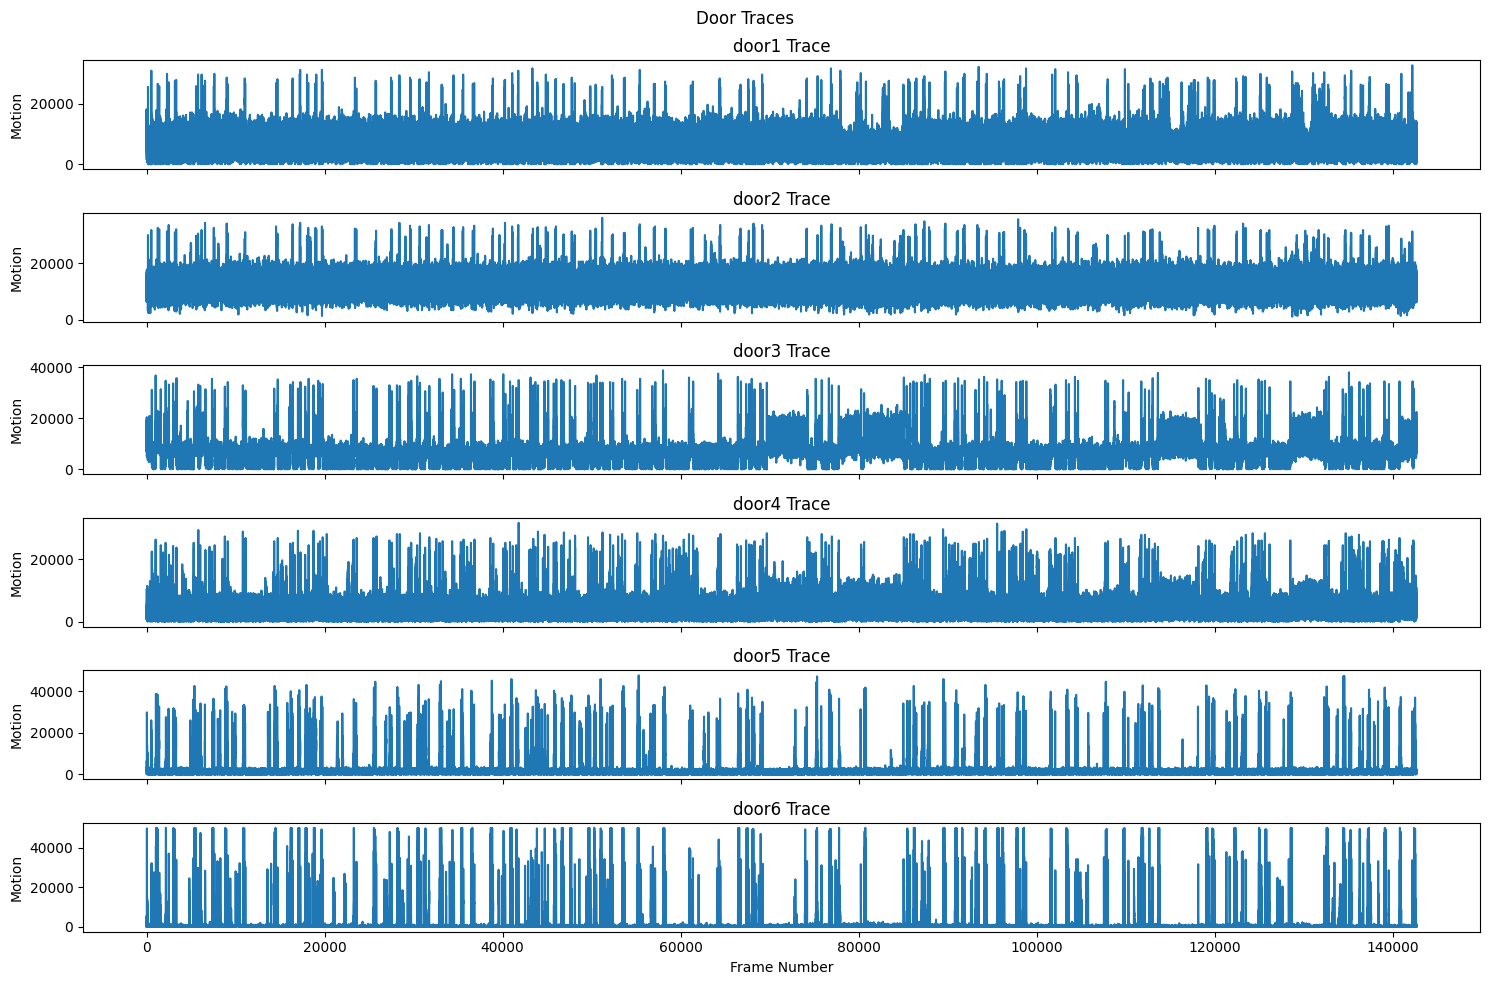

In [2]:
pkl_file = r"N:\TMAZE\TMAZE_REFIND_VID_NEW\Cropped_ATO1_Vidoes\ATO1_2025-03-22T18_28_44_doorTraces.pkl"
dat = openDoorTracesPkl(pkl_file)
plotDoorTraces(dat)

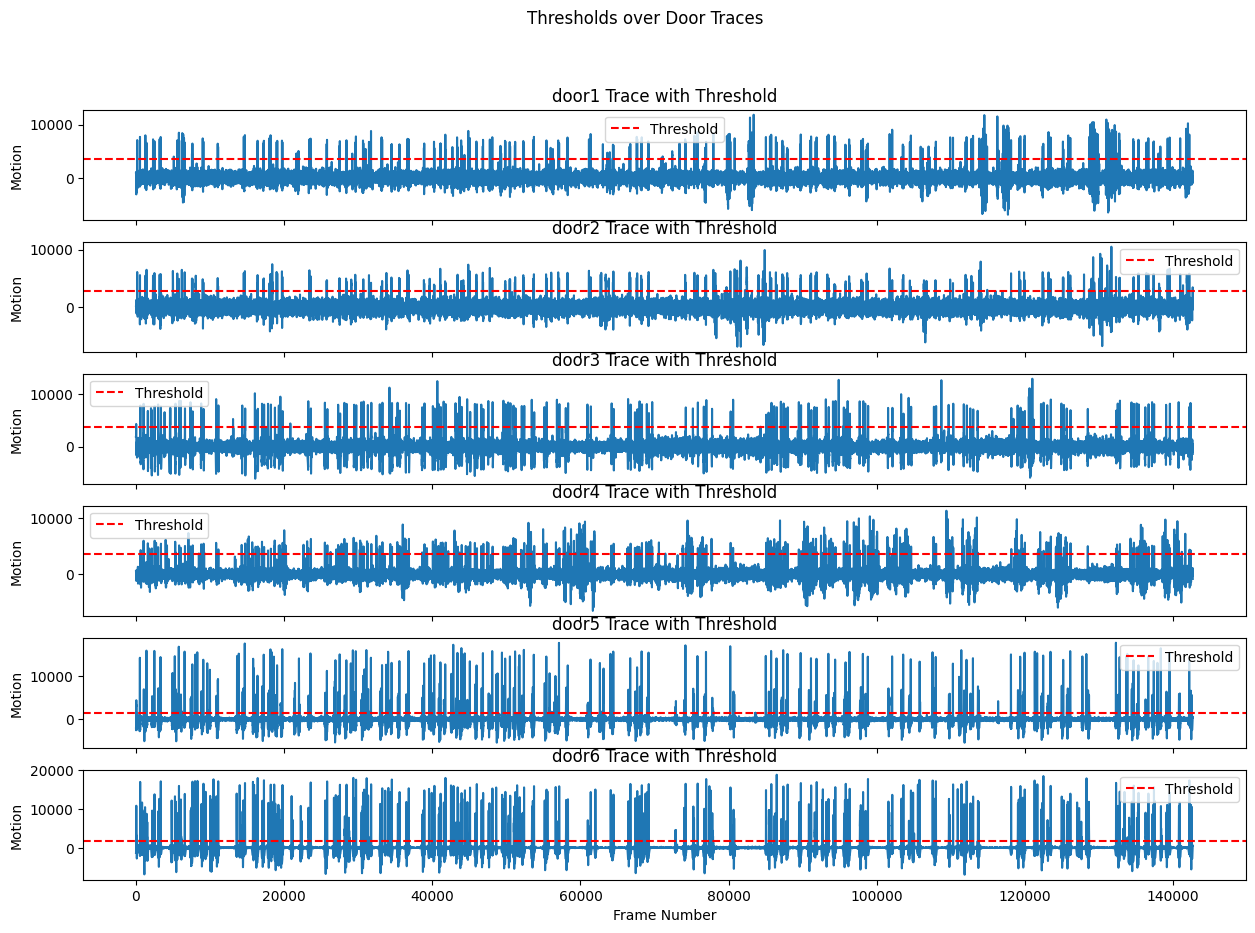

In [3]:
dat = process_door_traces(dat, plot = True)

In [4]:
z, x = extract_floor_traces(dat)



In [5]:
print(z)
print(x)

[38, 1051, 2173, 3014, 5361, 5478, 6056, 7379, 8829, 10853, 14370, 16179, 17039, 17850, 18782, 19519, 23280, 25525, 27314, 28161, 29472, 30430, 31324, 32938, 34356, 35340, 36477, 38656, 40102, 40861, 41556, 43170, 43710, 44729, 45775, 46638, 47588, 49625, 50272, 50995, 52102, 53450, 55156, 56855, 58048, 60975, 64246, 66456, 67384, 68008, 68982, 72793, 73986, 75208, 76686, 77790, 80642, 85427, 86183, 87088, 87762, 89509, 90822, 91622, 93152, 94115, 95581, 96094, 97724, 98475, 101556, 103317, 104332, 107743, 109728, 111777, 112124, 112649, 113645, 119042, 119705, 122199, 123044, 124954, 125665, 128516, 132554, 134411, 135114, 136277, 137192, 139088, 140781, 142371]
[81, 1231, 2283, 3156, 5389, 5538, 6168, 7522, 8972, 10994, 14514, 16324, 17256, 17993, 18931, 19671, 23390, 25781, 27426, 28407, 29521, 30679, 31431, 33113, 34400, 35482, 36619, 38906, 40136, 41104, 41668, 43302, 43939, 44836, 45991, 46846, 47731, 49848, 50406, 51186, 52246, 53595, 55314, 56964, 58207, 61104, 64444, 66598, 67

In [6]:
print(len(z))
print(len(x))
import pandas as pd
fps = 30
floors_trials_df = pd.DataFrame({
    'trial_start_frame': z,
    'trial_end_frame': x,
    'trial_start_time': [frame/fps for frame in z],
    'trial_end_time': [frame/fps for frame in x],
    'trial_duration': [(end - start)/fps for start, end in zip(z, x)]
})

print(floors_trials_df)

94
94
    trial_start_frame  trial_end_frame  trial_start_time  trial_end_time  \
0                  38               81          1.266667        2.700000   
1                1051             1231         35.033333       41.033333   
2                2173             2283         72.433333       76.100000   
3                3014             3156        100.466667      105.200000   
4                5361             5389        178.700000      179.633333   
..                ...              ...               ...             ...   
89             136277           136386       4542.566667     4546.200000   
90             137192           137406       4573.066667     4580.200000   
91             139088           139232       4636.266667     4641.066667   
92             140781           140924       4692.700000     4697.466667   
93             142371           142533       4745.700000     4751.100000   

    trial_duration  
0         1.433333  
1         6.000000  
2         3.666667

In [7]:
#Convert to minutes
for i in range(len(floors_trials_df)):
    floors_trials_df['trial_start_time'][i] = floors_trials_df['trial_start_time'][i] / 60
    floors_trials_df['trial_end_time'][i] = floors_trials_df['trial_end_time'][i] / 60


C:\Users\rlampre\AppData\Local\Temp\ipykernel_36420\2452863390.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  floors_trials_df['trial_start_time'][i] = floors_trials_df['trial_start_time'][i] / 60
C:\Users\rlampre\AppData\Local\Temp\ipy

In [8]:
print(floors_trials_df)

    trial_start_frame  trial_end_frame  trial_start_time  trial_end_time  \
0                  38               81          0.021111        0.045000   
1                1051             1231          0.583889        0.683889   
2                2173             2283          1.207222        1.268333   
3                3014             3156          1.674444        1.753333   
4                5361             5389          2.978333        2.993889   
..                ...              ...               ...             ...   
89             136277           136386         75.709444       75.770000   
90             137192           137406         76.217778       76.336667   
91             139088           139232         77.271111       77.351111   
92             140781           140924         78.211667       78.291111   
93             142371           142533         79.095000       79.185000   

    trial_duration  
0         1.433333  
1         6.000000  
2         3.666667  
3  

In [9]:
#from tmaze_toolkit.visualization.videoTools import visualize_video_with_stamps
#video_path = r"N:\TMAZE\TMAZE_REFIND_VID_NEW\Cropped_ATO1_Vidoes\ATO1_2025-03-22T18_28_44.mp4"
#visualize_video_with_stamps(video_path, floors_trials_df)

In [10]:
events = extract_trial_times(dat, pad_frames=90)

Expected 346 trial starts, but got 357
Expected 94 trial starts, but got 90
Expected 94 trial ends, but got 90
94
94
Trial 0 likely has a missed detection in the doors 1 and 2
Trial 1 likely has a missed detection in the doors 1 and 2
Trial 2 likely has a missed detection in the doors 1 and 2
Trial 3 likely has a missed detection in the doors 1 and 2
Trial 4 likely has a missed detection in the doors 1 and 2
Trial 5 likely has a missed detection in the doors 1 and 2
Trial 6 likely has a missed detection in the doors 1 and 2
Trial 7 likely has a missed detection in the doors 1 and 2
Trial 8 likely has a missed detection in the doors 1 and 2
Trial 9 likely has a missed detection in the doors 1 and 2
Trial 10 likely has a missed detection in the doors 1 and 2
Trial 11 likely has a missed detection in the doors 1 and 2
Trial 12 likely has a missed detection in the doors 1 and 2
Trial 13 likely has a missed detection in the doors 1 and 2
Trial 14 likely has a missed detection in the doors 1

In [11]:
import glob

jsonFileLocation = r"N:\TMAZE\TMAZE_DATA\data_ATO1_20250322*"
outDict = {}
outDict['originalFiles'] = []
n = 0
# load json files related to video
#Note the star here calls all json files with names that match up until the star
json_files = glob.glob(jsonFileLocation)
json_files.sort()
print(len(json_files))

print(len(json_files[0] + json_files[1]))

2
100


In [12]:
import pandas as pd
#Extract animal ID so it's not hard coded
filename = jsonFileLocation.split('\\')[-1] #Last item in the path is the filename
animal_id = filename.split('_')[1] # Split by _ and the second item is the animal id
print(animal_id)
print(len(outDict))

for file in json_files:
    print('Working on file {}'.format(file))
    outDict['originalFiles']
    outDict['originalFiles'].append(file)
    json_dict = pd.read_json(file)
    for i in range(len(json_dict[animal_id])):
        trialID = 'trial{}'.format(i+1) #Refine the id
        outDict[n] = json_dict[animal_id][trialID]
        n += 1



ATO1
1
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250322_182807.json
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250322_190937.json


In [26]:
print(len(outDict))
print(outDict[0])
print(outDict[1])
print(outDict[2])
print(outDict[89])

print(len(outDict))

91
{'MazeTexture': 'CNO', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'incorrect', 'floorID': 'F,4', 'time_for_trial': 2, 'valve': 4, 'lick': 'left(V1)', 'trial_number': 1, 'trial_time': [2025, 3, 22, 18, 28, 23, 5, 81, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 5, 'BiasCorrection(T/F)': False, 'coneHeight_1(floor1)': '0.5', 'coneHeight_2(floor2)': '1', 'Injection': '1'}
{'MazeTexture': 'CNO', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'incorrect', 'floorID': 'F,1', 'time_for_trial': 6, 'valve': 1, 'lick': 'right(V2)', 'trial_number': 2, 'trial_time': [2025, 3, 22, 18, 28, 57, 5, 81, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 5, 'BiasCorrection(T/F)': False, 'coneHeight_1(floor1)': '0.5', 'coneHeight_2(floor2)': '1', 'Injection': '1'}
{'MazeTexture': 'CNO', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'incorrect', 'floorID': 'F,4', 'time_for_trial': 1, 'valve': 4, 'lick': 'left(V1)', 'trial_number': 3, 'trial_time':

In [14]:
# Create the file name and where we will save it

#Where is the json file located
dir_path = os.path.dirname(jsonFileLocation)

# Filename already esablished
date_id = filename.split('_')[2]
date_id = date_id.split('.')[0] # remove the .json ext
if date_id[-1]=='*':
    date_id = date_id[0:-1] # remove the * if there is one. If it's a singular json file theres no need to remove a star.

# Sanity check
print(date_id)

# Example file = BDY5_20240701_data.pkl
pkl_filename = f"{animal_id}_{date_id}_data.pkl"

#Create
pkl_file_path = os.path.join(dir_path, pkl_filename)

print(pkl_file_path)

NameError: name 'os' is not defined

In [ ]:
## save new dictionary to data folder
with open(pkl_file_path, 'wb') as f:
    pickle.dump(outDict, f, protocol=pickle.HIGHEST_PROTOCOL)

outDict[0]